# Forest fire simulation

In [2]:
# Simple CA simulator in Python
# *** Forest fire ***
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
# Modified to run with Python 3

import matplotlib.pyplot as plt
import pylab as PL
import random as RD
import scipy as SP
import numpy as np
RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)

def init(initProb):
    global time, config, nextConfig, prop_char
    time = 0
    prop_char = []
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))
    PL.show()
    
def plot_proportion():
    PL.figure(figsize=(15, 6))
    PL.plot(prop_char)
    PL.xlabel("Time steps")
    PL.show()

def step():
    global time, config, nextConfig
    time += 1
    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state
    
    prop_char.append(np.count_nonzero(config.ravel() == 3)/\
                    (np.count_nonzero(config.ravel() == 3)\
                    +np.count_nonzero(config.ravel() == 1)))
    config, nextConfig = nextConfig, config

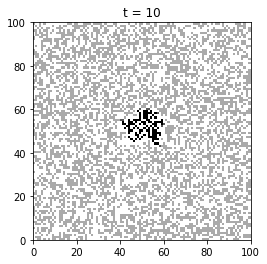

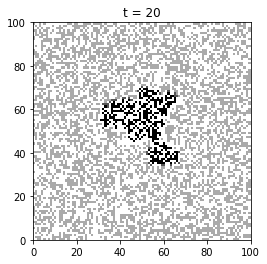

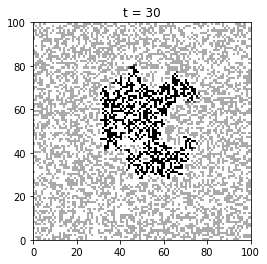

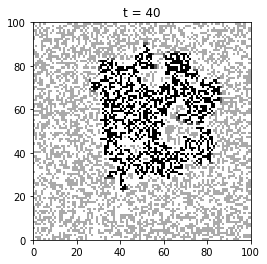

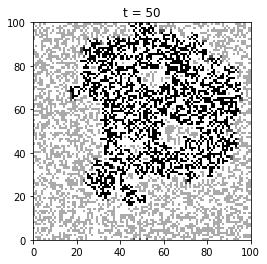

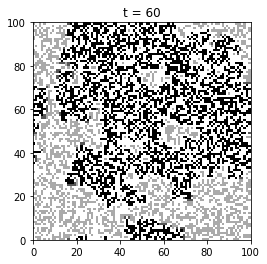

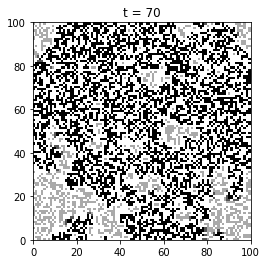

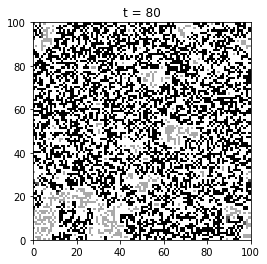

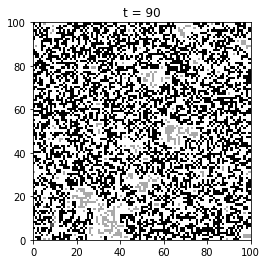

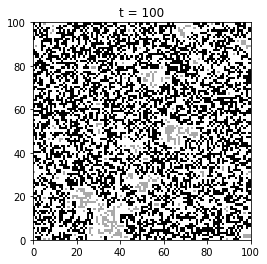

In [6]:
init(0.45)
for i in range(1, 101):
    step()
    if i%10 == 0:
        draw()

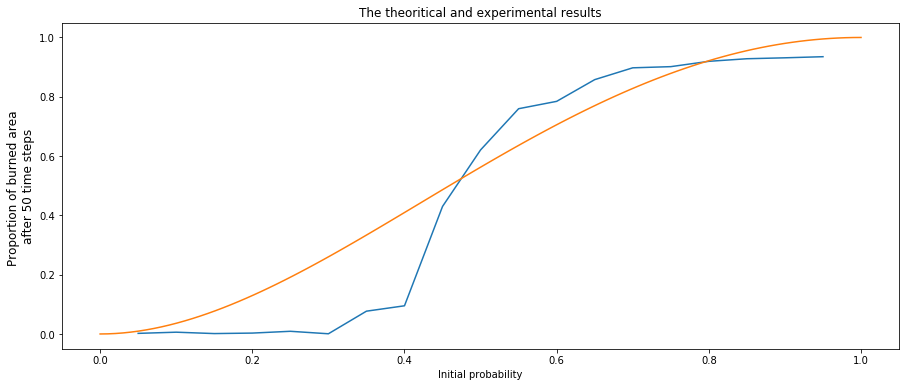

In [94]:
burned, pro_list = [], []

def func(p):
    return p**4 + 4*p**3*(1-p) + 4*p**2*(1-p)**2

x = np.linspace(0,1, 100)
theo_p = [f(_) for _ in x]

for proba in range(1, 20):
    init(proba/20)
    for i in range(1, 50):
        step()
    burned.append(prop_char[-1])
    pro_list.append(proba/20)

plt.figure(figsize=(15, 6))
plt.plot(pro_list, burned, label="experimental")
plt.plot(x, theo_p, label="theoritical")
plt.title("The theoritical and experimental results")
plt.xlabel("Initial probability")
plt.ylabel("Proportion of burned area \nafter 50 time steps", 
          fontsize=12)
plt.show()

# Sayama Exercise 12.8
Why is it not correct to assume that the relationship between the 1×1 blocks and the 2×2 blocks can be applied to 2×2 and 4×4 (and larger)? Look at Fig. 12.6 carefully and figure out some configurations that violate this assumption:

The assumption is that the configurations that conduct the fire across a two-cell gap are considered to be the same based on their conductance output (ie., either it transmits fire or not) where in reality, the microlevel configuration of the 2×2 square matters.
Example of configuration that would not transit fire are the diagonal 2×2 squares, having two of them in the 4×4 level would not conduct the fire. This is an example of coarse-graining when it fails to hold rules across higher dimensions.

# (Optional) Stretch goal:
- Modify the forest fire simulation to include a new parameter — an ignition probability, i. Rather than a burning tree automatically igniting an adjacent tree, it will now ignite it with probability i. This is a generalization of the basic forest fire simulation, which corresponds to i = 1. Experiment with different values of the model parameters q and i. What are the critical values of these model parameters? Do a renormalization group analysis on this model and determine approximate theoretical critical values for the model parameters. How well do the theoretical values match your experimental values?
- Note: This is a challenging exercise! Particularly well-executed submissions for a stretch goal can score a 5 on the relevant learning outcome (#caanalysis).

In [8]:
RD.seed()

width = 100
height = 100
empty, tree, fire, char = range(4)

def init(initProb):
    global time, config, nextConfig, prop_char
    time = 0
    prop_char = []
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire
    nextConfig = SP.zeros([height, width])

def step(ignition):
    for i in range(1, 50):
        global time, config, nextConfig
        time += 1
        for x in range(width):
            for y in range(height):
                state = config[y, x]
                if state == fire:
                    state = char
                elif state == tree:
                    for dx in range(-1, 2):
                        for dy in range(-1, 2):
                            if config[(y+dy)%height, (x+dx)%width] == fire:
                                if RD.random() < ignition:
                                    state = fire
                nextConfig[y, x] = state
        prop_char.append(np.count_nonzero(config.ravel() == 3)/\
                        (np.count_nonzero(config.ravel() == 3)\
                        +np.count_nonzero(config.ravel() == 1)))
        config, nextConfig = nextConfig, config
    return prop_char[-1]

In [9]:
val = [_/20 for _ in range(1,21)]
matrix_qi = []
for proba in val:
    for ign in val:
        init(proba)
        matrix_qi.append(step(ign))
matrix_qii = np.array(matrix_qi)

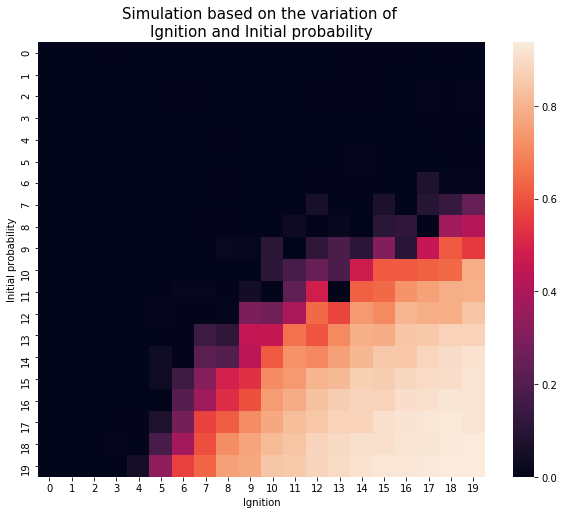

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matrix_qii.reshape((20,20)))
plt.title('Simulation based on the variation of \nIgnition and Initial probability',
         fontsize=15)
plt.xlabel('Ignition')
plt.ylabel('Initial probability')
plt.show()

The graph shows the proportion of the burned area of the forest based on the values of the following parameters:
- **i**: The ignition, or the probability of a burning tree to transmit the fire to a neighboring tree
- **q**: The probability of conductance

The degree of both i, q vary from 0.05 to 1 so in order to interpret the values on the axis we just have to devide them over 20. We can notice that the fire propagate after 50 time steps is the heated region of the plot. Theoritically, we expect the Renormalization Group Analysis to be a curve on the border of that heated region and the non-burned region (black) 